# About Dataset

Description: This dataset contains sales data for a retail store during the Diwali festival period in India. The data includes information on the products sold, their categories, the sales channels, the dates and times of sale, the sale prices, and the quantities sold.

In [1]:
# Import python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = "unicode_escape")

In [ ]:
# Reading a sample of data

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
# Dataset shape

In [4]:
df.shape

(11251, 15)

# Data Cleaning


The first step in Data Cleaning in this project is to find out if any column contains NULL Values, using df.info() function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


As we can observe that Status and unnamed1 columns have zero NOT NULL values. This implies that all of their values are NULL. Hence, we will drop them.We can observe that Amount column has comparitively less NOT NULL values.

In [ ]:
df.drop(["Status","unnamed1"], axis=1, inplace=True)

Next, let us check out how many NULL values do we have left in each column.

In [6]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [9]:
df.shape

(11251, 13)

Let's drop the rows containing NULL values.

In [10]:
df.dropna(inplace=True)

To check whether this worked, we will see the shape of the dataframe.

In [11]:
df.shape

(11239, 13)

In [12]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

This dataset indicates that there are no missing (null) values present across any of the columns.

In [13]:
# Change data type

df["Amount"] = df["Amount"].astype("int")

# Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Gender

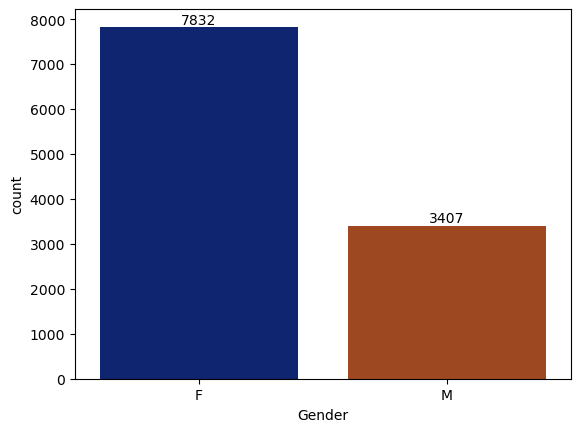

In [16]:
sns.set_palette("dark")
gen = sns.countplot(x= df["Gender"])

for bars in gen.containers:
    gen.bar_label(bars)
        

In [22]:
sales_gen = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

In [23]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


In [2]:
# plotting a bar chart for gender vs total amount


<Axes: xlabel='Gender', ylabel='Amount'>

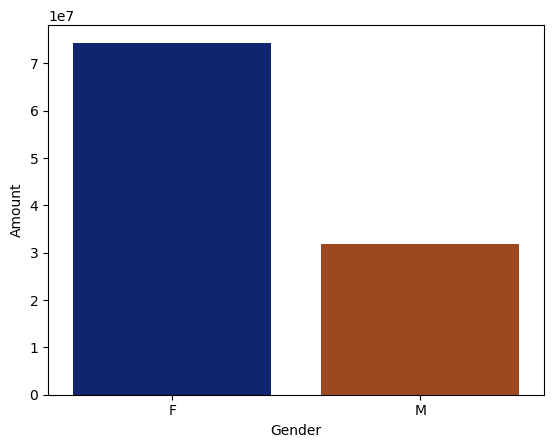

In [24]:
sns.barplot(x="Gender",y="Amount",data=sales_gen)

##### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

## Age

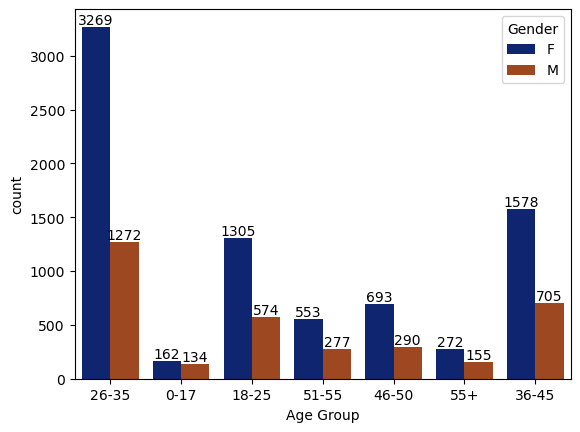

In [35]:
sns.set_palette("dark")
age = sns.countplot(data=df,x= df["Age Group"],hue="Gender")

for bars in age.containers:
    age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

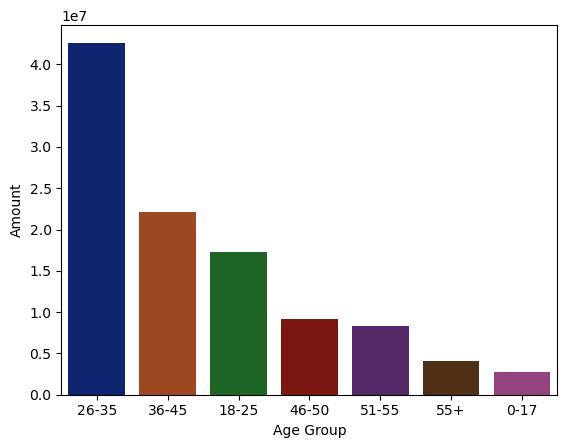

In [38]:
# Total amount vs Age group

sales_age_gr = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.barplot(x="Age Group",y="Amount",data=sales_age_gr)

##### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.

### State

<Axes: xlabel='State', ylabel='Orders'>

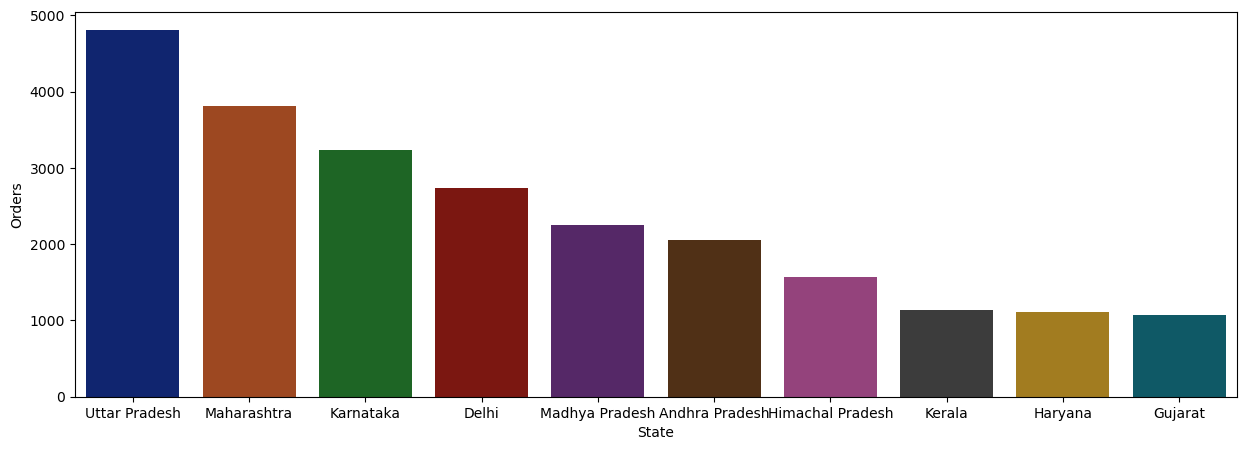

In [42]:
# Total number of orders from top 10 states.

sales_state = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="State",y="Orders",data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

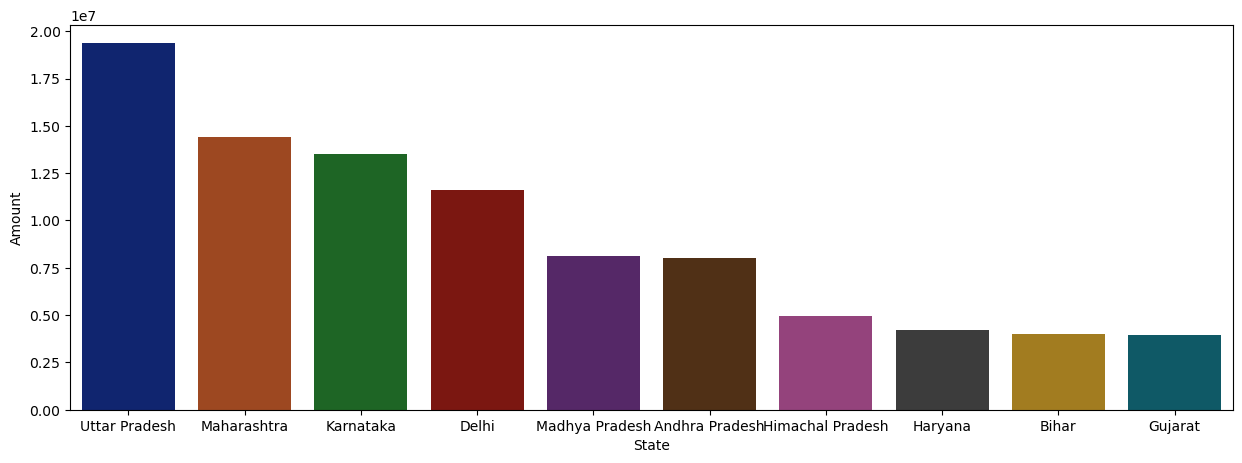

In [43]:
# total amount/sales from top 10 states

sales_state_amt = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="State",y="Amount",data=sales_state_amt)

##### From above graphs we can see that most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively. 

### Marital Status

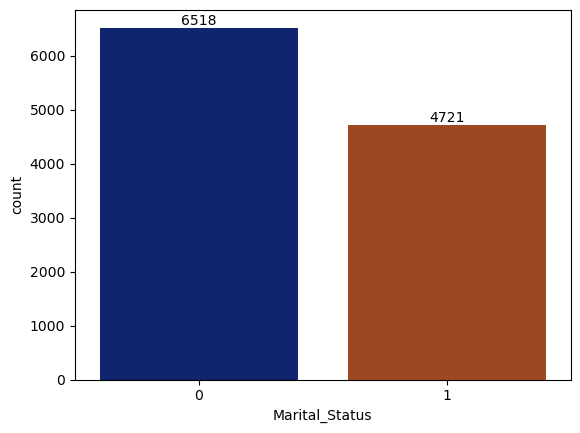

In [44]:
# Marital Status

sns.set_palette("dark")
marital = sns.countplot(data=df,x= df["Marital_Status"])

for bars in marital.containers:
    marital.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

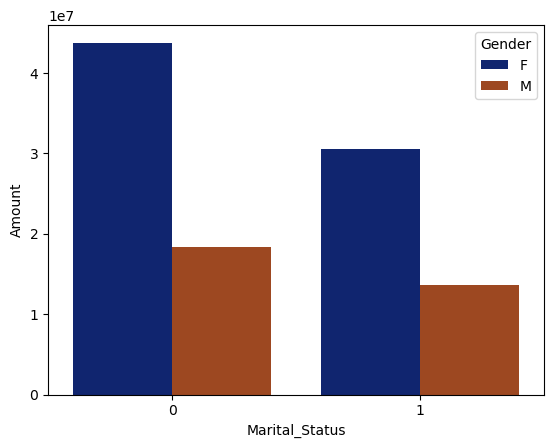

In [50]:
sales_amt = df.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.barplot(x="Marital_Status",y="Amount",data=sales_amt,hue="Gender")

#### From above graphs we can see that most of the buyers are married(women) and they have high purchasing power.

### Occupation

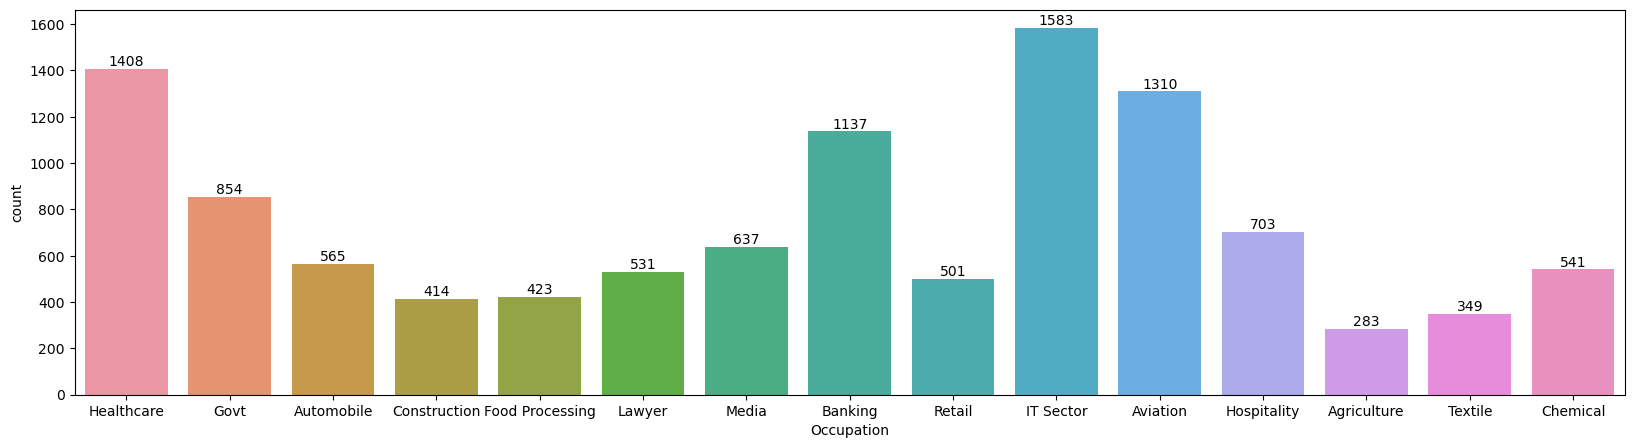

In [52]:
# Occupation

plt.figure(figsize=(20,5))

sns.set_palette("dark")
opn = sns.countplot(data=df,x= df["Occupation"])

for bars in opn.containers:
    opn.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

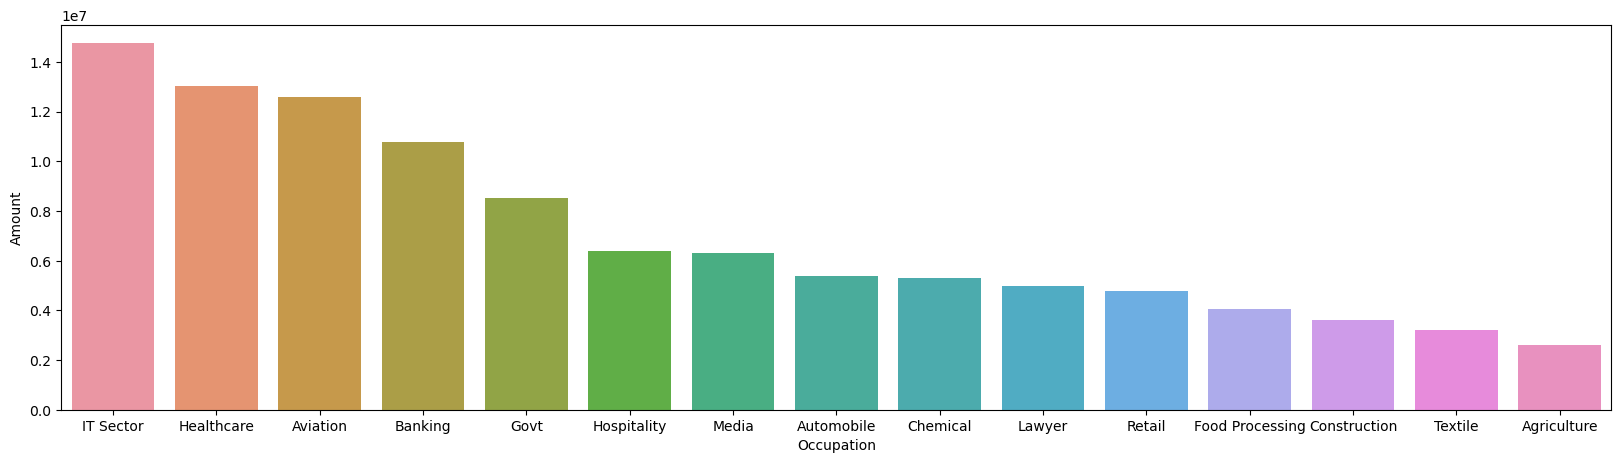

In [54]:
sales_opn = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x="Occupation",y="Amount",data=sales_opn)

#### From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare sector.

### Product Category 

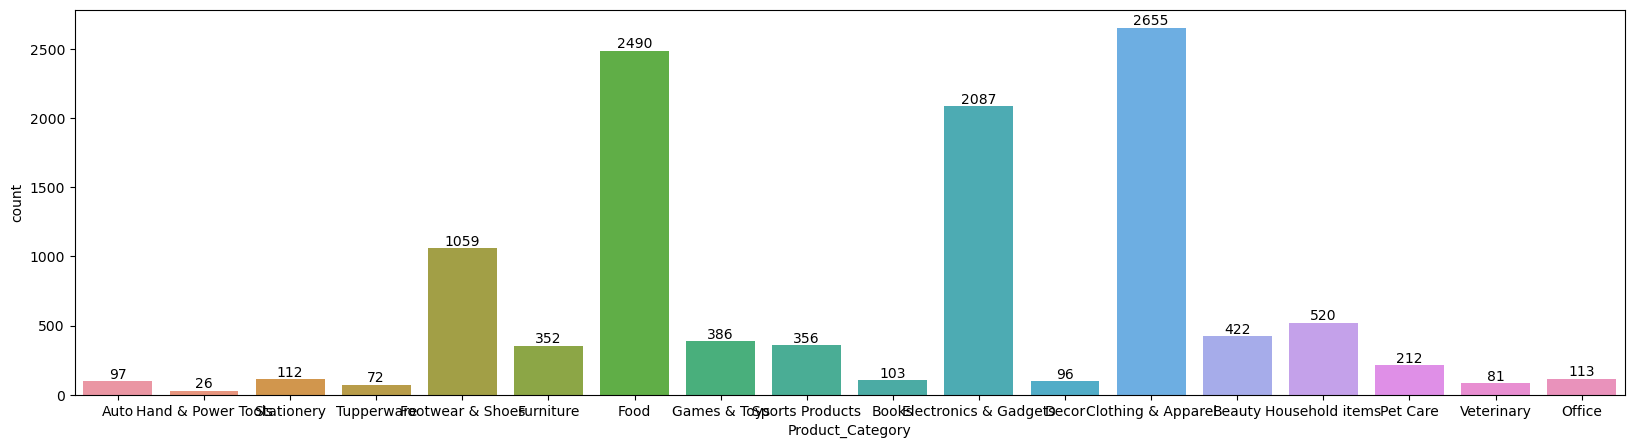

In [55]:
plt.figure(figsize=(20,5))

sns.set_palette("dark")
prod_category = sns.countplot(data=df,x= df["Product_Category"])

for bars in prod_category.containers:
    prod_category.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

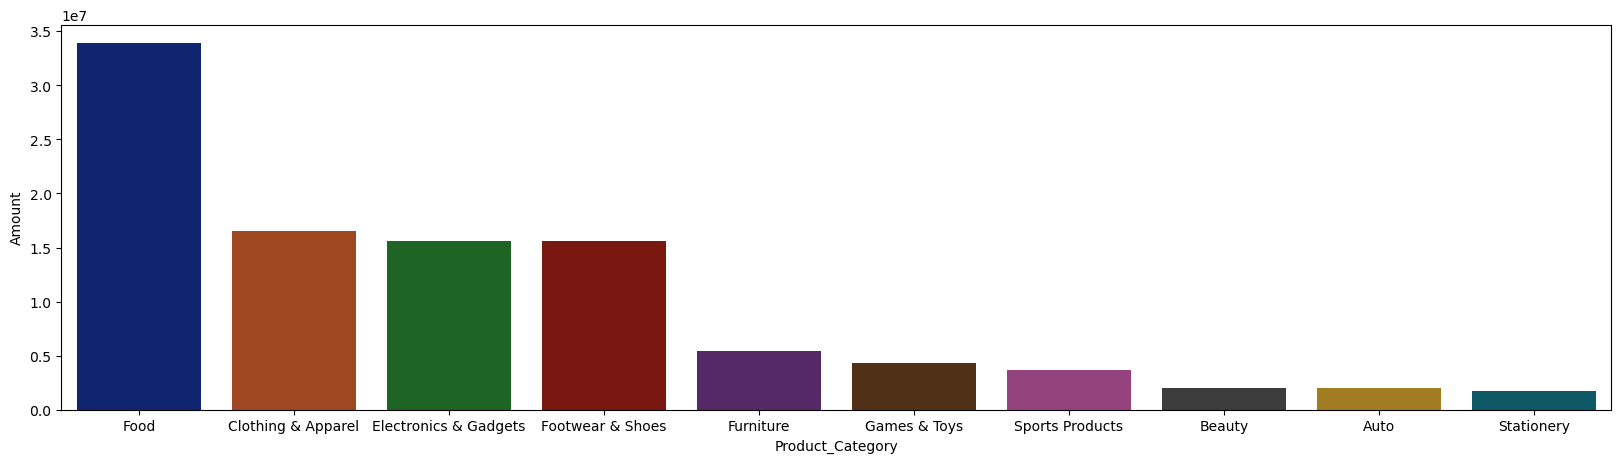

In [57]:
sales_product = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x="Product_Category",y="Amount",data=sales_product)

#### From above graphs we can see that most of the sold products are from Food,Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

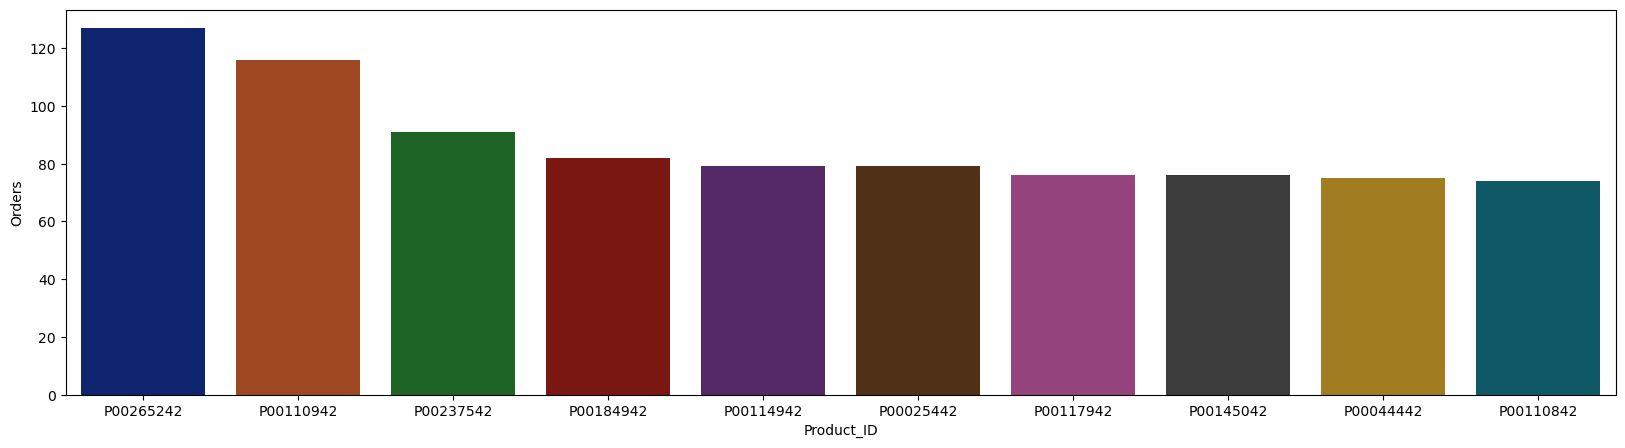

In [58]:
sales_product = df.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x="Product_ID",y="Orders",data=sales_product)

<Axes: xlabel='Product_ID'>

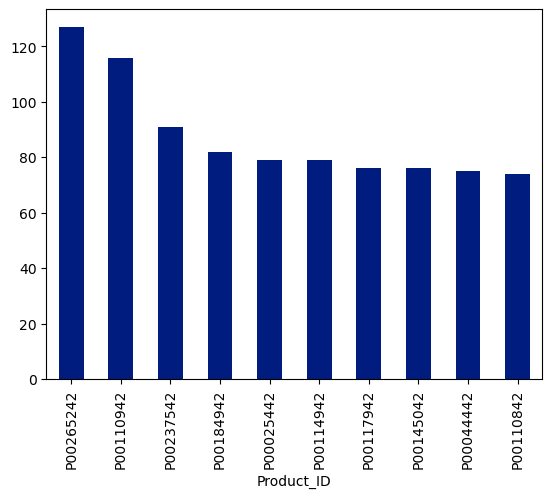

In [59]:
# Top 10 most sold products 
df.groupby("Product_ID")["Orders"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar")

# Conclusion

#### Married women are group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.